In [8]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")
df.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [9]:
df = df.drop(df.columns[0], axis=1)
df[1:5]

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


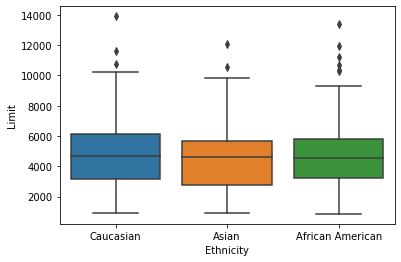

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot(df.Ethnicity, df.Limit)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_enc = df.apply(le.fit_transform)
df_enc.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,43,131,99,1,11,6,0,0,1,2,67
1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,294,215,143,1,45,11,0,0,1,2,66


In [15]:
X = df_enc[["Income", "Age"]]
y = df_enc[["Ethnicity"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=20)
model = abc.fit(X_train, y_train)
pred = model.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_test['pred'] = pred
y_test

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ethnicity,pred
132,0,1
390,1,0
310,0,2
3,1,1
248,2,1
...,...,...
361,1,2
197,0,2
23,0,2
54,1,1


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test.Ethnicity, y_test.pred)

array([[ 3,  3, 10],
       [ 7,  7, 12],
       [ 6,  9, 23]], dtype=int64)

In [22]:
accuracy_score(y_test.Ethnicity, y_test.pred)

0.4125

In [23]:
model.feature_importances_

array([0.50887545, 0.49112455])

<BarContainer object of 2 artists>

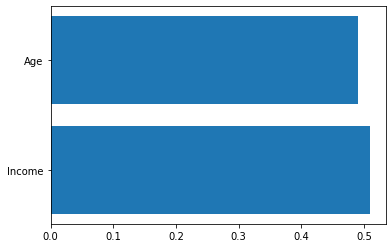

In [24]:
plt.barh(X.columns, model.feature_importances_)